In [28]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
data=pd.DataFrame(iris.data)
data.columns=iris.feature_names
data['target']=iris.target
data1=data[data['target']!=0]


data1.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [123]:
def y_0_1(row):
    if row['target']==2:
        row['target']=0
    return row


data2=data1.apply(y_0_1, axis=1)
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


In [127]:
y=data2['target']
x=data1.filter(['petal length (cm)','petal width (cm)'], axis=1)

In [128]:
from sklearn.linear_model import  LogisticRegression
model= LogisticRegression()

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(sc,y,test_size=0.25, random_state=40)

model.fit(x,y)
y_pred=model.predict(x)
model.score(x,y)

0.95

In [129]:
model.coef_

array([[-2.77743512, -2.38548149]])

In [130]:
model. intercept_

array([17.5471049])

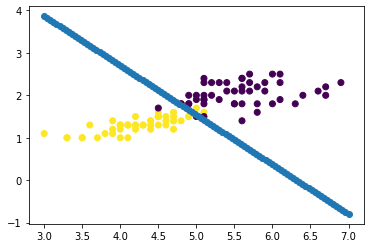

In [131]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c=y)
v=np.linspace(3,7,100)
w=(17.5471049-2.77743512*v)/2.38548149
plt.scatter(v,w)

In [188]:
import math
from scipy import optimize
y=np.array(y)
x=np.array(x)

In [193]:
def p(f):
    return 1/(1+math.exp(-f))

def lin(th,x0,x1):
    return th[0] + th[1]*x0 + th[2]*x1

def cost_function(theta):
    total_cost = 0
    for i in range(len(x)):
        total_cost += y[i]*math.log(p(lin(theta,x[i,0],x[i,1]))) +(1-y[i])*math.log(1-p(lin(theta,x[i,0],x[i,1])))
    return -total_cost



In [194]:
EPOCHS = 50
LEARNING_RATE = 0.001
theta = (1,2,2)
for _ in range(EPOCHS):
    grad=optimize.approx_fprime(theta, cost_function, 0)    
    theta = theta - LEARNING_RATE * grad    
    print("t-", theta, "cost:", cost_function(theta))

t- [0.94885915 1.72359007 1.89814978] cost: 718.1961693835754
t- [0.89885319 1.44596079 1.79665155] cost: 628.3490642776814
t- [0.84887502 1.16834691 1.69533906] cost: 538.5386914284651
t- [0.79889911 0.89083933 1.59406711] cost: 448.80743183020064
t- [0.74898502 0.61359014 1.49287634] cost: 359.3338682407027
t- [0.69930754 0.33734121 1.39200138] cost: 270.87716361789853
t- [0.65055114 0.06514912 1.29242151] cost: 186.49118165718093
t- [ 0.6053527  -0.19067777  1.19814399] cost: 116.79142500994567
t- [ 0.57175019 -0.39065323  1.12229505] cost: 80.76965663801062
t- [ 0.55890545 -0.48721675  1.08128317] cost: 73.34587458379974
t- [ 0.55938056 -0.51670991  1.06325024] cost: 72.53429704122166
t- [ 0.56412304 -0.52470108  1.05264822] cost: 72.36995503885466
t- [ 0.57013271 -0.52628995  1.04427257] cost: 72.26445510320019
t- [ 0.57652523 -0.52592275  1.03658646] cost: 72.1647572508165
t- [ 0.5830315  -0.52495192  1.02912203] cost: 72.06586357449343
t- [ 0.58956833 -0.52379541  1.02173466] co

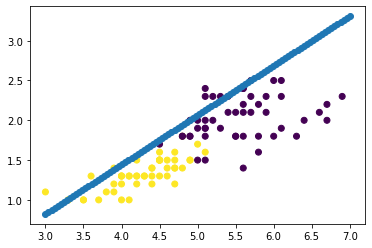

In [186]:
plt.scatter(x[:,0],x[:,1], c=y)
v=np.linspace(3,7,100)
w=(-0.80831329+0.48325844*v)/ 0.77849866
plt.scatter(v,w)